#                        Pre-processing and Exploratory Analyses                                     #


The studied variables are listed below:

- id: Unique record identifier
- affected_count: Number of data records involved in the breach
- total_amount: Dollar cost of the breach
- sector: Text description of the naic_sector field
- breach_date: Date the breach occurred
- cause: High level summary of the cause of the breach

These variables were in the dataset but they were not used for any analyses

- naic_sector: Two digit NAICS code of the industry sector
- naic_national_industry: Full six-digit NAICS code for the breached company

## Pre-processing

#### * Import the requested libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### * Load the file

In [2]:
arquivo = 'cyberattack_challenge.csv'
dataset = pd.read_csv(arquivo, sep=',' ,header=0)

#### * Exploratory view

In [3]:
dataset.head()

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
0,1,15,10269,44.0,446110.0,Retail,26/10/2014,Internal - Other
1,2,39,332165,61.0,611210.0,Education,17/08/2020,Internal - Consultant
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,External - Other
3,4,10,1471919,54.0,541715.0,Professional,09/04/2011,Internal - Trusted Third Party (TTP)
4,5,1,3986,92.0,926130.0,Public,31/03/2019,Internal - Trusted Third Party (TTP)


#### * Verify the kinds of data in the dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10000 non-null  int64  
 1   affected_count          10000 non-null  int64  
 2   total_amount            10000 non-null  int64  
 3   naic_sector             9865 non-null   float64
 4   naic_national_industry  9865 non-null   float64
 5   sector                  9865 non-null   object 
 6   breach_date             10000 non-null  object 
 7   cause                   9294 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 625.1+ KB


#### * Data Cleaning
    * Verify columns with null values - The dataset will be processed according to the hypothesis to be tested

In [5]:
dataset.isnull().sum()

id                          0
affected_count              0
total_amount                0
naic_sector               135
naic_national_industry    135
sector                    135
breach_date                 0
cause                     706
dtype: int64

     * Verify the presence of duplicates
     * Delete duplicates - take out the hash in case of the verifying is 'true'

In [6]:
print(any(dataset.duplicated()))
# dataset = dataset.drop_duplicates()

False


    * Delete rows with null values

In [7]:
dataset1 = dataset.dropna(axis=0, how='all')
dataset1.isnull().sum()

id                          0
affected_count              0
total_amount                0
naic_sector               135
naic_national_industry    135
sector                    135
breach_date                 0
cause                     706
dtype: int64

#### * Filter the dataset
    * Exclude breaches that did not affect any account
    * Exclude Internal breaches
    * Exclude the string "External" - which does not make sense in the dataset anymore

In [8]:
dataset1 = dataset1.loc[dataset1['affected_count'] >= 1]
dataset1

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
0,1,15,10269,44.0,446110.0,Retail,26/10/2014,Internal - Other
1,2,39,332165,61.0,611210.0,Education,17/08/2020,Internal - Consultant
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,External - Other
3,4,10,1471919,54.0,541715.0,Professional,09/04/2011,Internal - Trusted Third Party (TTP)
4,5,1,3986,92.0,926130.0,Public,31/03/2019,Internal - Trusted Third Party (TTP)
...,...,...,...,...,...,...,...,...
9995,9996,27,5791,NaN,NaN,NaN,26/01/2014,Internal - Other
9996,9997,17790,2134,56.0,561599.0,Administrative,22/09/2017,External - Former Consultant
9997,9998,45,3246,62.0,621111.0,Healthcare,14/09/2016,Internal - Trusted Third Party (TTP)
9998,9999,1515,2528131,22.0,221210.0,Utilities,05/06/2012,Internal - Employee


In [9]:
discard = ["Internal"]
dataset1 = dataset1[~dataset1.cause.str.contains('|'.join(discard),na=False)]
dataset1

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,External - Other
5,6,1309,438795,54.0,541611.0,Professional,13/09/2019,External - Former Employee
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,External - Former Consultant
9,10,62,25913,51.0,517919.0,Information,10/02/2017,External - Criminal Organization
13,14,2280,396347,23.0,237210.0,Construction,24/12/2012,External - Hacktivist
...,...,...,...,...,...,...,...,...
9989,9990,1,23503,72.0,722511.0,Hospitality,23/02/2014,External - Vendor
9990,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,External - Former Employee
9991,9992,2,4017792,52.0,523120.0,Financial,19/02/2013,External - Criminal Organization
9993,9994,2109,117368,51.0,511210.0,Information,18/06/2013,NaN


In [10]:
dataset1['cause'] = dataset1['cause'].str.replace(r"External - ","")
dataset1

C:\Users\warri\AppData\Local\Temp/ipykernel_5576/1875750187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['cause'] = dataset1['cause'].str.replace(r"External - ","")


,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
2,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other
5,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee
6,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant
9,10,62,25913,51.0,517919.0,Information,10/02/2017,Criminal Organization
13,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist
...,...,...,...,...,...,...,...,...
9989,9990,1,23503,72.0,722511.0,Hospitality,23/02/2014,Vendor
9990,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,Former Employee
9991,9992,2,4017792,52.0,523120.0,Financial,19/02/2013,Criminal Organization
9993,9994,2109,117368,51.0,511210.0,Information,18/06/2013,NaN


#### * Save the general dataframe

In [11]:
dataset1.to_csv('cyberattack_clean.csv', index = False);

## Exploratory analyses

#### 1) What sectors were more affected?
Knowing the sectors that are more affected by the breaches is of extreme importance. Once knowing the most targeted sectors, measures towards a higher security its system might be taken. The objective of the following logic is to answer how many times different sectors were attacked during the period of study.

#### * Get data
    * In case of a new session, take the hash out 

In [12]:
#arquivo = 'cyberattack_clean.csv'
#dataset1 = pd.read_csv(arquivo, sep=',' ,header=0)

#### * Clean data

In [13]:
dataset2 = dataset1.dropna(subset=['sector'], axis=0, how='any')
dataset2.isnull().sum()

id                          0
affected_count              0
total_amount                0
naic_sector                 0
naic_national_industry      0
sector                      0
breach_date                 0
cause                     602
dtype: int64

#### * Creat a new column for years

In [14]:
dataset2['year'] = pd.DatetimeIndex(dataset2['breach_date']).year
dataset2.to_csv('cyberattack_clean2.csv', index = False)
dataset2

C:\Users\warri\AppData\Local\Temp/ipykernel_5576/2621869537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['year'] = pd.DatetimeIndex(dataset2['breach_date']).year


,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
0,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other,2019
1,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee,2019
2,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant,2014
3,10,62,25913,51.0,517919.0,Information,10/02/2017,Criminal Organization,2017
4,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist,2012
...,...,...,...,...,...,...,...,...,...
5585,9990,1,23503,72.0,722511.0,Hospitality,23/02/2014,Vendor,2014
5586,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,Former Employee,2013
5587,9992,2,4017792,52.0,523120.0,Financial,19/02/2013,Criminal Organization,2013
5588,9994,2109,117368,51.0,511210.0,Information,18/06/2013,NaN,2013


#### * Set data to plot the graph
    * Create a crosstab
    * Exclude the last row
    * Adjust the columns

In [15]:
dataset3 = pd.crosstab(dataset2["sector"], dataset2["year"],margins=True)
dataset3

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
sector,,,,,,,,,,,
Administrative,51,59,59,54,69,53,76,52,71,64,608
Agriculture,1,2,0,1,1,2,0,3,1,0,11
Construction,12,8,7,8,7,9,8,8,12,8,87
Education,39,44,42,42,35,28,48,51,50,34,413
Entertainment,8,8,6,8,8,8,15,6,9,10,86
Financial,79,64,71,72,68,81,65,65,60,65,690
Healthcare,62,61,72,51,65,58,73,64,67,67,640
Hospitality,22,28,21,23,18,23,10,22,17,20,204
Information,27,27,39,29,34,39,26,28,33,36,318


In [16]:
dataset3 = dataset3[:-1]
dataset3

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
sector,,,,,,,,,,,
Administrative,51,59,59,54,69,53,76,52,71,64,608
Agriculture,1,2,0,1,1,2,0,3,1,0,11
Construction,12,8,7,8,7,9,8,8,12,8,87
Education,39,44,42,42,35,28,48,51,50,34,413
Entertainment,8,8,6,8,8,8,15,6,9,10,86
Financial,79,64,71,72,68,81,65,65,60,65,690
Healthcare,62,61,72,51,65,58,73,64,67,67,640
Hospitality,22,28,21,23,18,23,10,22,17,20,204
Information,27,27,39,29,34,39,26,28,33,36,318


In [17]:
dataset3.to_csv('sector_year.csv', index = True)
arquivo = 'sector_year.csv'
dataset3 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset3

,sector,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
0,Administrative,51,59,59,54,69,53,76,52,71,64,608
1,Agriculture,1,2,0,1,1,2,0,3,1,0,11
2,Construction,12,8,7,8,7,9,8,8,12,8,87
3,Education,39,44,42,42,35,28,48,51,50,34,413
4,Entertainment,8,8,6,8,8,8,15,6,9,10,86
5,Financial,79,64,71,72,68,81,65,65,60,65,690
6,Healthcare,62,61,72,51,65,58,73,64,67,67,640
7,Hospitality,22,28,21,23,18,23,10,22,17,20,204
8,Information,27,27,39,29,34,39,26,28,33,36,318
9,Management,9,9,8,8,13,16,13,9,14,8,107


#### * Barplot showing the number of attacks by sector

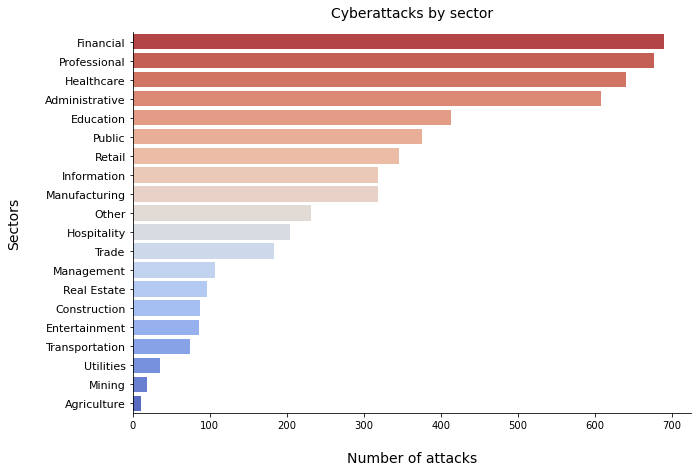

In [18]:
fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.barplot(data=dataset3,
                 x = "All",
                 y = "sector",
                 ci = None,
                 palette = "coolwarm_r",
                 order=dataset3.sort_values('All', ascending=False).sector)

ax.set_title('Cyberattacks by sector',
             fontsize=14,
             pad=15.0)

plt.xlabel("Number of attacks",
           fontsize=14)

plt.ylabel("Sectors",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.2, 0.5)

sns.despine()

plt.savefig("breaches_by_sector.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

#### * Create a new dataset just with the relevant groups

In [19]:
dataset3B = dataset3.loc[(dataset3['sector'] == "Financial") |
                         (dataset3['sector'] == "Professional") |
                         (dataset3['sector'] == "Healthcare") |
                         (dataset3['sector'] == "Administrative") |
                         (dataset3['sector'] == "Education") |
                         (dataset3['sector'] == "Public") |
                         (dataset3['sector'] == "Retail") |
                         (dataset3['sector'] == "Information") |
                         (dataset3['sector'] == "Manufacturing")]
dataset3B

,sector,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
0,Administrative,51,59,59,54,69,53,76,52,71,64,608
3,Education,39,44,42,42,35,28,48,51,50,34,413
5,Financial,79,64,71,72,68,81,65,65,60,65,690
6,Healthcare,62,61,72,51,65,58,73,64,67,67,640
8,Information,27,27,39,29,34,39,26,28,33,36,318
10,Manufacturing,27,32,29,40,35,27,31,34,32,31,318
13,Professional,72,72,52,76,53,72,66,81,69,64,677
14,Public,42,41,39,30,43,40,35,33,36,36,375
16,Retail,32,29,32,43,37,34,40,32,30,37,346


#### * Barplot showing the number of attacks by sectors (sliced)

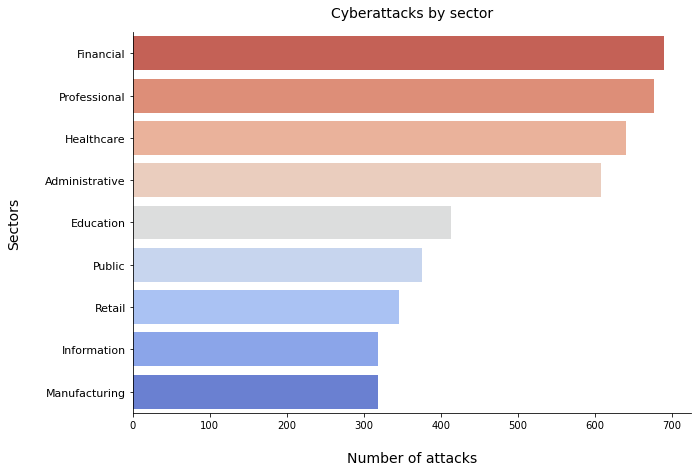

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.barplot(data=dataset3B,
                 x = "All",
                 y = "sector",
                 ci = None,
                 palette = "coolwarm_r",
                 order=dataset3B.sort_values('All', ascending=False).sector)

ax.set_title('Cyberattacks by sector',
             fontsize=14,
             pad=15.0)

plt.xlabel("Number of attacks",
           fontsize=14)

plt.ylabel("Sectors",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.2, 0.5)

sns.despine()

plt.savefig("breaches_by_sectorB.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result1* --> The sectors which are more attacked are: Financial, Professional, Healthcare and Adminstrative. As a second group we can mention: Education, Public, Retail, Information and Manufacturing. The remaining sectors do not have more than 300 attacks considering the studied period. It is important to note that the most attacked sectors are vital for the functioning and management of a country. Probably, this is why they were the most targeted.

#### 2) How many breaches occur by year and what is their occurrence considering the most affected sectors?
The number of breaches that occur by year might indicate a failure in the security system if there is a year in which the number of attacks is higher. From that, an investigation might be conducted to know what were the conditions in which these breaches happened and also measures towards a higher system protection might be taken. The objective here is to know the number of breaches by year, in total and by sector. Only the most attacked sectors were taken into consideration here.

#### * Get data
    * In case of a new session, take the hashes out

In [30]:
#arquivo = 'cyberattack_clean2.csv'
#dataset2 = pd.read_csv(arquivo, sep=',' ,header=0)
#dataset2

#### * Filter the dataset

In [23]:
dataset4 = dataset2.loc[(dataset2['sector'] == "Financial") |
                        (dataset2['sector'] == "Professional") |
                        (dataset2['sector'] == "Healthcare") |
                        (dataset2['sector'] == "Administrative") |
                        (dataset2['sector'] == "Education")]
dataset4.head()

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
0,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other,2019
1,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee,2019
2,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant,2014
5,15,636,238298,54.0,541110.0,Professional,25/03/2013,Former Employee,2013
7,17,8646,11080,52.0,522291.0,Financial,11/10/2017,Vendor,2017


#### * Create a crosstab

In [24]:
dataset5 = pd.crosstab(dataset4["year"],dataset4["sector"],margins=False)
dataset5

sector,Administrative,Education,Financial,Healthcare,Professional
year,,,,,
2011,51,39,79,62,72
2012,59,44,64,61,72
2013,59,42,71,72,52
2014,54,42,72,51,76
2015,69,35,68,65,53
2016,53,28,81,58,72
2017,76,48,65,73,66
2018,52,51,65,64,81
2019,71,50,60,67,69


#### * Stacked barplot showing the number of attacks by sector by year

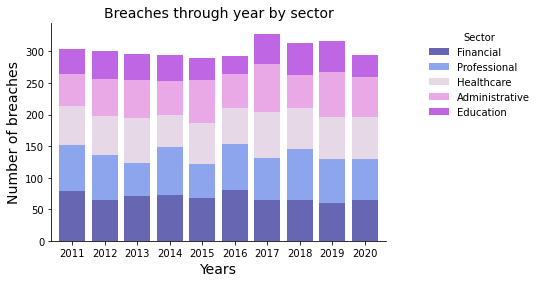

In [25]:
ax = dataset5[['Financial',
              'Professional',
              'Healthcare',
              'Administrative',
              'Education']].plot(kind='bar',
                                 stacked=True,
                                 rot=0,
                                 width = 0.8,
                                 alpha = 0.6,
                                 color = ['navy','royalblue','thistle','orchid','darkviolet'])

ax.set_title('Breaches through year by sector',
             fontsize=14)

plt.legend(loc = 'upper left',
           title='Sector',
           frameon=False,
           bbox_to_anchor=(1.1, 1.0))

plt.xlabel("Years",
           fontsize=14)

plt.ylabel("Number of breaches",
           fontsize=14)

sns.despine()

plt.savefig("breaches_through_year.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 2* --> There are not significant differences in the number of attacks through years. Overall, the number of attacks on each sector is not significantly different either. The size of the bar of each sector is similar, although Education presents a lower number of attacks. So, apparently, there is not a preffered target considering the evaluated groups.

#### 3) What group made more attacks against the system?
The group that made more attacks against the system is the one more active. Knowing who they are is important once the police and intelligence services might be placed on their tracks. 

#### * Get data
    * In case of a new session, take the hashes out

In [ ]:
#arquivo = 'cyberattack_clean.csv'
#dataset1 = pd.read_csv(arquivo, sep=',' ,header=0)
#dataset1

#### * Clean the dataset

In [26]:
dataset6 = dataset1.dropna(subset=['cause'], axis=0, how='any')
dataset6.isnull().sum()

id                         0
affected_count             0
total_amount               0
naic_sector               68
naic_national_industry    68
sector                    68
breach_date                0
cause                      0
dtype: int64

#### * Create a new column for years 

In [27]:
dataset6['year'] = pd.DatetimeIndex(dataset6['breach_date']).year
dataset6.to_csv('cyberattack_clean3.csv', index = False)
dataset6

C:\Users\warri\AppData\Local\Temp/ipykernel_5576/2210930176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset6['year'] = pd.DatetimeIndex(dataset6['breach_date']).year


,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
0,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other,2019
1,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee,2019
2,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant,2014
3,10,62,25913,51.0,517919.0,Information,10/02/2017,Criminal Organization,2017
4,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist,2012
...,...,...,...,...,...,...,...,...,...
5583,9987,15,11859,56.0,561520.0,Administrative,02/10/2019,Vendor,2019
5585,9990,1,23503,72.0,722511.0,Hospitality,23/02/2014,Vendor,2014
5586,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,Former Employee,2013
5587,9992,2,4017792,52.0,523120.0,Financial,19/02/2013,Criminal Organization,2013


#### * Set data to plot the graph
    * Create a crosstab
    * Exclude the last row
    * Adjust the columns

In [28]:
dataset7 = pd.crosstab(dataset6["cause"], dataset6["year"],margins=True)
dataset7

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
cause,,,,,,,,,,,
Criminal Organization,55,58,60,68,53,65,76,54,61,52,602
Former Consultant,69,71,55,65,68,73,68,65,45,54,633
Former Employee,62,49,70,56,49,57,54,67,75,57,596
Hacktivist,50,69,63,62,64,57,67,46,70,64,612
Nation State,65,68,61,63,60,62,66,60,60,68,633
Other,68,54,72,59,77,64,75,78,67,62,676
Terrorist,53,63,57,67,66,57,60,60,66,75,624
Vendor,66,69,51,62,56,64,51,70,64,56,609
All,488,501,489,502,493,499,517,500,508,488,4985


In [29]:
dataset7 = dataset7[:-1]
dataset7

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
cause,,,,,,,,,,,
Criminal Organization,55,58,60,68,53,65,76,54,61,52,602
Former Consultant,69,71,55,65,68,73,68,65,45,54,633
Former Employee,62,49,70,56,49,57,54,67,75,57,596
Hacktivist,50,69,63,62,64,57,67,46,70,64,612
Nation State,65,68,61,63,60,62,66,60,60,68,633
Other,68,54,72,59,77,64,75,78,67,62,676
Terrorist,53,63,57,67,66,57,60,60,66,75,624
Vendor,66,69,51,62,56,64,51,70,64,56,609


In [30]:
dataset7.to_csv('cause_year.csv', index = True)
arquivo = 'cause_year.csv'
dataset7 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset7

,cause,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
0,Criminal Organization,55,58,60,68,53,65,76,54,61,52,602
1,Former Consultant,69,71,55,65,68,73,68,65,45,54,633
2,Former Employee,62,49,70,56,49,57,54,67,75,57,596
3,Hacktivist,50,69,63,62,64,57,67,46,70,64,612
4,Nation State,65,68,61,63,60,62,66,60,60,68,633
5,Other,68,54,72,59,77,64,75,78,67,62,676
6,Terrorist,53,63,57,67,66,57,60,60,66,75,624
7,Vendor,66,69,51,62,56,64,51,70,64,56,609


#### * Barplot showing the number of attacks by group

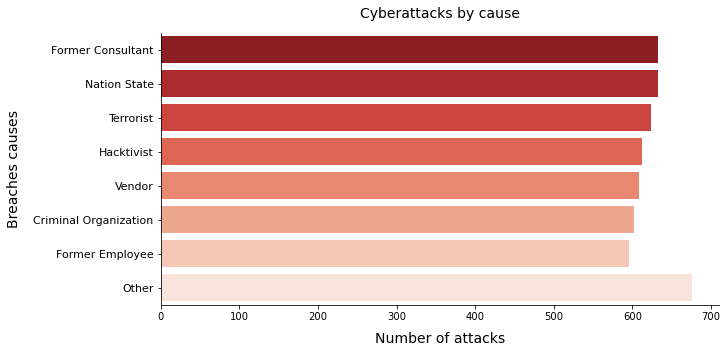

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data=dataset7,
                 x = "All",
                 y = "cause",
                 ci = None,
                 palette = "Reds_r",
                 order=['Former Consultant',
                        'Nation State',
                        'Terrorist',
                        'Hacktivist',
                        'Vendor',
                        'Criminal Organization',
                        'Former Employee',
                        'Other'])

ax.set_title('Cyberattacks by cause',
             fontsize=14,
             pad=15.0)

plt.xlabel("Number of attacks",
           fontsize=14)

plt.ylabel("Breaches causes",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.25, 0.5)

sns.despine()

plt.savefig("breaches_by_cause.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 3* --> There are not differences in the number of attacks made by each evaluated group. They all have attacked a similar number of times. So, considering just the number of attacks, there are not groups that deserve a special attention. 

#### 4) What is the pattern of the attacks by each group?
Although there are no differences in the number of attacks made by each group, they might have different preferences regarding their targets. Knowing this trend might be useful once the security agents know how the groups are attacking their systems. This might also help to develop strategies in order to refrain future breaches. The objective here is to investigate if there is a pattern of attack concerning the different breach causes. This investigation was made just considering the most attacked sectors.

#### * Get data
    * In case of a new session, take the hashes out

In [ ]:
#arquivo = 'cyberattack_clean3.csv'
#dataset6 = pd.read_csv(arquivo, sep=',' ,header=0)
#dataset6

#### * Filter the dataset

In [32]:
dataset8 = dataset6.loc[(dataset6['cause'] == "Former Consultant") |
                        (dataset6['cause'] == "Nation State") |
                        (dataset6['cause'] == "Terrorist") |
                        (dataset6['cause'] == "Hacktivist") |
                        (dataset6['cause'] == "Vendor") |
                        (dataset6['cause'] == "Criminal Organization") |
                        (dataset6['cause'] == "Former Employee")]
dataset8.head()

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
1,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee,2019
2,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant,2014
3,10,62,25913,51.0,517919.0,Information,10/02/2017,Criminal Organization,2017
4,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist,2012
5,15,636,238298,54.0,541110.0,Professional,25/03/2013,Former Employee,2013


In [33]:
dataset8 = dataset8.loc[(dataset8['sector'] == "Financial") |
                        (dataset8['sector'] == "Professional") |
                        (dataset8['sector'] == "Healthcare") |
                        (dataset8['sector'] == "Administrative") |
                        (dataset8['sector'] == "Education")]
dataset8.head()

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause,year
1,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee,2019
2,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant,2014
5,15,636,238298,54.0,541110.0,Professional,25/03/2013,Former Employee,2013
7,17,8646,11080,52.0,522291.0,Financial,11/10/2017,Vendor,2017
8,18,1369,535985,56.0,561510.0,Administrative,07/04/2014,Terrorist,2014


#### * Create a crosstable

In [34]:
dataset9 = pd.crosstab(dataset8["cause"],dataset8["sector"],margins=False)
dataset9

sector,Administrative,Education,Financial,Healthcare,Professional
cause,,,,,
Criminal Organization,56,38,72,72,80
Former Consultant,84,41,74,75,78
Former Employee,70,47,75,65,62
Hacktivist,60,55,84,72,70
Nation State,56,45,80,67,82
Terrorist,65,54,75,80,64
Vendor,82,52,78,57,64


#### * Stacked barplot showing the pattern of attacks by group

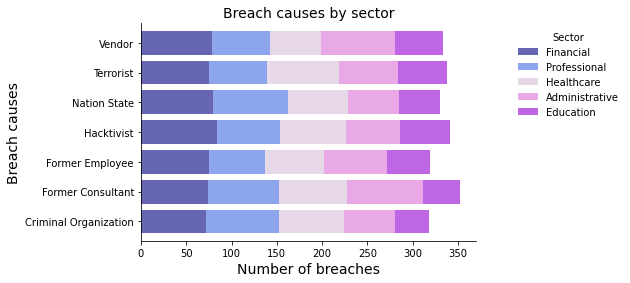

In [35]:
ax = dataset9[['Financial',
              'Professional',
              'Healthcare',
              'Administrative',
              'Education']].plot(kind='barh',
                                 stacked=True,
                                 rot=0,
                                 width = 0.8,
                                 alpha = 0.6,
                                 color = ['navy','royalblue','thistle','orchid','darkviolet'])

ax.set_title('Breach causes by sector',
             fontsize=14)

plt.legend(loc = 'upper left',
           title='Sector',
           frameon=False,
           bbox_to_anchor=(1.1, 1.0))

plt.xlabel("Number of breaches",
           fontsize=14)

plt.ylabel("Breach causes",
           fontsize=14)

sns.despine()

plt.savefig("causes_by_sector.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 4* --> There is no pattern among the target of the attacking groups. None of the sectors stands out in none of them. The Financial sector seems to be a little more attacked than the other sectors, but it is a slight difference.  

#### 5) What is the accumulated cost of the breaches by sector
Each breach on the system affects a certain number of accounts and by consequence, it generates an associated cost. As important as the number of breaches by sector is, knowing how much this costed to the public coffers is also essential. Here, the objective is to investigate how much money was spent during the studied period due to breaches in different sectors.   

#### * Get data
    * In case of a new session, take the hashes out

In [ ]:
#arquivo = 'cyberattack_clean.csv'
#dataset1 = pd.read_csv(arquivo, sep=',' ,header=0)
#dataset1

#### * Clean the dataset

In [36]:
dataset10 = dataset1.dropna(subset=['sector'], axis=0, how='any')
dataset10.isnull().sum()

id                          0
affected_count              0
total_amount                0
naic_sector                 0
naic_national_industry      0
sector                      0
breach_date                 0
cause                     602
dtype: int64

#### * Set data to plot the graph
    * Create a grouped dataset (by sector)
    * Adjust the columns
    * Create a column to express money amount in billion dollars

In [37]:
dataset11 = dataset10.groupby(['sector']).sum()
dataset11

,id,affected_count,total_amount,naic_sector,naic_national_industry
sector,,,,,
Administrative,2927224,5542869,5731390927,34048.0,341468141.0
Agriculture,59456,14810,3380740,121.0,1235668.0
Construction,477105,802537,225052133,2001.0,20647859.0
Education,2030370,6051383,3402988474,25193.0,252452946.0
Entertainment,405448,5372812,136889333,6106.0,61260802.0
Financial,3549792,24807092,1422225047,35880.0,360915287.0
Healthcare,3281962,6656299,2320553064,39680.0,398033580.0
Hospitality,1029220,609468,617688844,14688.0,147285307.0
Information,1540802,1848228,1732474660,16218.0,163983452.0


In [38]:
dataset11.to_csv('totalcost_sector.csv', index = True)
arquivo = 'totalcost_sector.csv'
dataset11 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset11

,sector,id,affected_count,total_amount,naic_sector,naic_national_industry
0,Administrative,2927224,5542869,5731390927,34048.0,341468141.0
1,Agriculture,59456,14810,3380740,121.0,1235668.0
2,Construction,477105,802537,225052133,2001.0,20647859.0
3,Education,2030370,6051383,3402988474,25193.0,252452946.0
4,Entertainment,405448,5372812,136889333,6106.0,61260802.0
5,Financial,3549792,24807092,1422225047,35880.0,360915287.0
6,Healthcare,3281962,6656299,2320553064,39680.0,398033580.0
7,Hospitality,1029220,609468,617688844,14688.0,147285307.0
8,Information,1540802,1848228,1732474660,16218.0,163983452.0
9,Management,548192,882680,354689448,5885.0,58968970.0


In [39]:
dataset11['total_amount_billion'] = dataset11['total_amount']/1000000000
dataset11

,sector,id,affected_count,total_amount,naic_sector,naic_national_industry,total_amount_billion
0,Administrative,2927224,5542869,5731390927,34048.0,341468141.0,5.731391
1,Agriculture,59456,14810,3380740,121.0,1235668.0,0.003381
2,Construction,477105,802537,225052133,2001.0,20647859.0,0.225052
3,Education,2030370,6051383,3402988474,25193.0,252452946.0,3.402988
4,Entertainment,405448,5372812,136889333,6106.0,61260802.0,0.136889
5,Financial,3549792,24807092,1422225047,35880.0,360915287.0,1.422225
6,Healthcare,3281962,6656299,2320553064,39680.0,398033580.0,2.320553
7,Hospitality,1029220,609468,617688844,14688.0,147285307.0,0.617689
8,Information,1540802,1848228,1732474660,16218.0,163983452.0,1.732475
9,Management,548192,882680,354689448,5885.0,58968970.0,0.354689


#### * Barplot showing how much money the breaches on each sector costed

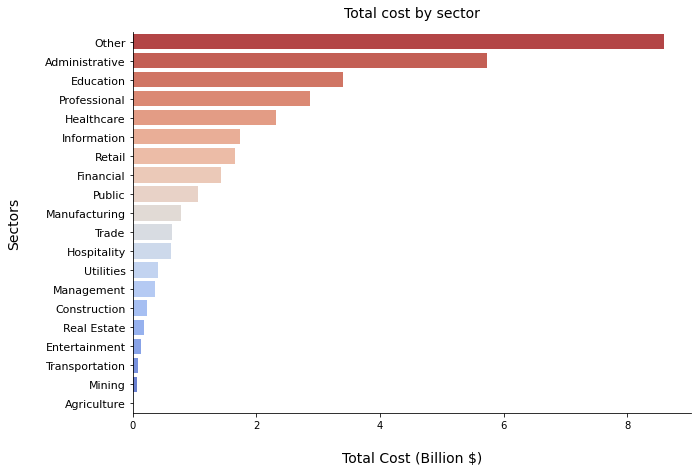

In [40]:
fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.barplot(data=dataset11,
                 x = "total_amount_billion",
                 y = "sector",
                 ci = None,
                 palette = "coolwarm_r",
                 order=dataset11.sort_values('total_amount_billion', ascending=False).sector)


ax.set_title('Total cost by sector',
             fontsize=14,
             pad=15.0)

plt.xlabel("Total Cost (Billion $)",
           fontsize=14)

plt.ylabel("Sectors",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.2, 0.5)

sns.despine()

plt.savefig("cost_by_sector.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

#### * Create a new dataset just with the relevant groups

In [41]:
dataset11B = dataset11.loc[(dataset11['sector'] == "Other") |
                         (dataset11['sector'] == "Administrative") |
                         (dataset11['sector'] == "Education") |
                         (dataset11['sector'] == "Professional") |
                         (dataset11['sector'] == "Healthcare") |
                         (dataset11['sector'] == "Financial") |
                         (dataset11['sector'] == "Retail") |
                         (dataset11['sector'] == "Information") |
                         (dataset11['sector'] == "Public")]
dataset11B

,sector,id,affected_count,total_amount,naic_sector,naic_national_industry,total_amount_billion
0,Administrative,2927224,5542869,5731390927,34048.0,341468141.0,5.731391
3,Education,2030370,6051383,3402988474,25193.0,252452946.0,3.402988
5,Financial,3549792,24807092,1422225047,35880.0,360915287.0,1.422225
6,Healthcare,3281962,6656299,2320553064,39680.0,398033580.0,2.320553
8,Information,1540802,1848228,1732474660,16218.0,163983452.0,1.732475
12,Other,1201214,1854537,8600071369,18792.0,188687755.0,8.600071
13,Professional,3469245,6932650,2864982331,36558.0,366560054.0,2.864982
14,Public,1830653,1821065,1061375677,34500.0,345751290.0,1.061376
16,Retail,1731292,11268327,1660000772,15318.0,154720798.0,1.660001


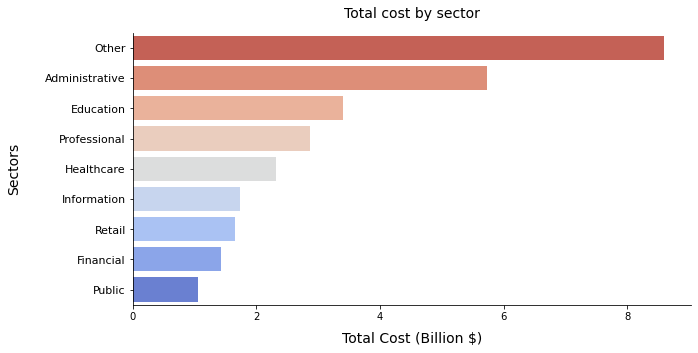

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data=dataset11B,
                 x = "total_amount_billion",
                 y = "sector",
                 ci = None,
                 palette = "coolwarm_r",
                 order=dataset11B.sort_values('total_amount_billion', ascending=False).sector)


ax.set_title('Total cost by sector',
             fontsize=14,
             pad=15.0)

plt.xlabel("Total Cost (Billion $)",
           fontsize=14)

plt.ylabel("Sectors",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.2, 0.5)

sns.despine()

plt.savefig("cost_by_sector2.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 5* --> Considering the financial losses caused by the attacks, "Other" sectors were the most affected. It reached more than 8 billion dollars of losses. So, it is important to know what sectors are these and how they are being invaded. The second sector which demands attention is the Adminstrative. The attacks on it caused almost 6 billion dollars of losses. It is important to investigate these two sectors in order to elucidate the causes of these losses. The other sectors did not reach more than four billion dollars of losses, which does not mean that they are not important. After elucidating the reasons behind the attacks on "Other" sectors and Administrative, further analyses would be essential to understand patterns of attack in the remaining groups.

#### 6) What kind of breach generates the biggest costs?
When each group breaks into the system, there is an objective behind it. Depending on what they are looking for, this can cause bigger or lower losses. The objective here is to investigate how much is spent with each kind of breach. After further investigation, it was discovered that one of the breaches on "Other" sectors caused more than 7 billion dollars of losses and it was made by "Other" groups. In order to understand the patterns of the attacks, this breach was excluded from the analyses, since it happened just once. 

#### * Get data
    * In case of a new session, take the hash out

In [ ]:
#arquivo = 'cyberattack_clean.csv'
#dataset1 = pd.read_csv(arquivo, sep=',' ,header=0)
#dataset1

#### * Clean the dataset

In [43]:
dataset12 = dataset1.dropna(subset=['cause'], axis=0, how='any')
dataset12.isnull().sum()

id                         0
affected_count             0
total_amount               0
naic_sector               68
naic_national_industry    68
sector                    68
breach_date                0
cause                      0
dtype: int64

#### * Exclude the outlier attack
    This attack was made by the group "Others" and caused more than $7 billion dollars of losses in one only breach.
    Since it was a special and uncommon event it was taken out from the dataset in order to visualize better the whole
    scenario

In [44]:
dataset12 = dataset12[dataset12.total_amount != 7915369031]
dataset12

,id,affected_count,total_amount,naic_sector,naic_national_industry,sector,breach_date,cause
0,3,90,4473,56.0,561790.0,Administrative,15/11/2019,Other
1,6,1309,438795,54.0,541611.0,Professional,13/09/2019,Former Employee
2,7,3985,71743,56.0,561990.0,Administrative,03/05/2014,Former Consultant
3,10,62,25913,51.0,517919.0,Information,10/02/2017,Criminal Organization
4,14,2280,396347,23.0,237210.0,Construction,24/12/2012,Hacktivist
...,...,...,...,...,...,...,...,...
5583,9987,15,11859,56.0,561520.0,Administrative,02/10/2019,Vendor
5585,9990,1,23503,72.0,722511.0,Hospitality,23/02/2014,Vendor
5586,9991,30865,9163116,56.0,561492.0,Administrative,03/11/2013,Former Employee
5587,9992,2,4017792,52.0,523120.0,Financial,19/02/2013,Criminal Organization


#### * Set data to plot the graph
    * Create a grouped dataset (by cause)
    * Adjust the columns
    * Create a column to express money amount in billion dollars

In [45]:
dataset12 = dataset12.groupby(['cause']).sum()
dataset12

,id,affected_count,total_amount,naic_sector,naic_national_industry
cause,,,,,
Criminal Organization,3135626,12511060,2765769398,33414.0,335788928.0
Former Consultant,3292453,7223709,4211158808,35400.0,355617584.0
Former Employee,2891954,9049815,2651834556,33320.0,334790993.0
Hacktivist,3119165,3578910,4898139274,34176.0,343339252.0
Nation State,3202351,12794653,1855010907,35453.0,356262110.0
Other,3417432,8313308,2308069214,37721.0,378999559.0
Terrorist,3037829,8990928,1381192220,35239.0,354083586.0
Vendor,2960350,5265358,2841383706,34253.0,344182149.0


In [46]:
dataset12.to_csv('totalcost_cause.csv', index = True)
arquivo = 'totalcost_cause.csv'
dataset12 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset12

,cause,id,affected_count,total_amount,naic_sector,naic_national_industry
0,Criminal Organization,3135626,12511060,2765769398,33414.0,335788928.0
1,Former Consultant,3292453,7223709,4211158808,35400.0,355617584.0
2,Former Employee,2891954,9049815,2651834556,33320.0,334790993.0
3,Hacktivist,3119165,3578910,4898139274,34176.0,343339252.0
4,Nation State,3202351,12794653,1855010907,35453.0,356262110.0
5,Other,3417432,8313308,2308069214,37721.0,378999559.0
6,Terrorist,3037829,8990928,1381192220,35239.0,354083586.0
7,Vendor,2960350,5265358,2841383706,34253.0,344182149.0


In [47]:
dataset12['total_amount_billion'] = dataset12['total_amount']/1000000000
dataset12

,cause,id,affected_count,total_amount,naic_sector,naic_national_industry,total_amount_billion
0,Criminal Organization,3135626,12511060,2765769398,33414.0,335788928.0,2.765769
1,Former Consultant,3292453,7223709,4211158808,35400.0,355617584.0,4.211159
2,Former Employee,2891954,9049815,2651834556,33320.0,334790993.0,2.651835
3,Hacktivist,3119165,3578910,4898139274,34176.0,343339252.0,4.898139
4,Nation State,3202351,12794653,1855010907,35453.0,356262110.0,1.855011
5,Other,3417432,8313308,2308069214,37721.0,378999559.0,2.308069
6,Terrorist,3037829,8990928,1381192220,35239.0,354083586.0,1.381192
7,Vendor,2960350,5265358,2841383706,34253.0,344182149.0,2.841384


#### * Boxplot showing the total cost the breaches from each group has caused 

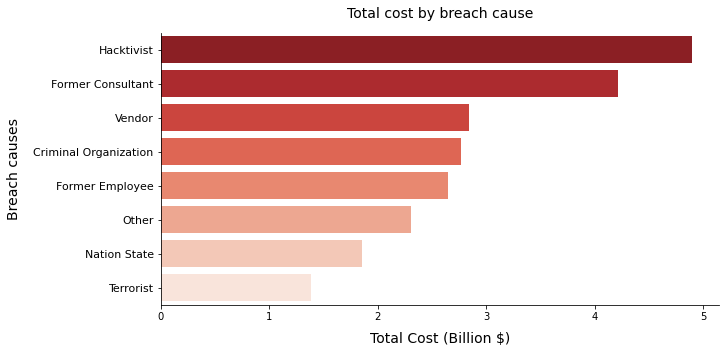

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(data=dataset12,
                 x = "total_amount_billion",
                 y = "cause",
                 ci = None,
                 palette = "Reds_r",
                 order=dataset12.sort_values('total_amount_billion', ascending=False).cause)


ax.set_title('Total cost by breach cause',
             fontsize=14,
             pad=15.0)

plt.xlabel("Total Cost (Billion $)",
           fontsize=14)

plt.ylabel("Breach causes",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.25, 0.5)

sns.despine()

plt.savefig("cost_by_cause.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 6* -->  Although the groups attack a similar number of times during the studied period (Result 3), the Hacktivist has caused the highest damage. Almost 5 billion dollars were lost due their attacks. It would be interesting, to investigate what are the sectors that the Hacktivists target more and strangthen their security systems. Also an investigation to find and arrest the offenders would be of very importance to the security of the country. Following them are the Former Consultants that caused more than 4 billion dollars of losses. These people were once in contact with important government data. It is mandatory that they are found, arrested and answer for their crimes. If the information they have get in the hands of more organized groups, bigger losses are going to happen. 

#### 7) What is the financial impact of each breach by sector
Beyond the total cost that the breaches in a sector caused, it is interesting to know in what sector the breaches are more effective concerning the losses. The objective here is to investigate what sector is attacked more efficiently regarding the loss caused by a breach. The breach made on sector "Other" was excluded from the analyses.

#### * Get data
    * In case of a new session, take the hash out

In [ ]:
#arquivo = 'cyberattack_clean.csv'
#dataset1 = pd.read_csv(arquivo, sep=',' ,header=0)
#dataset1

#### * Clean the dataset

In [49]:
dataset13 = dataset1.dropna(subset=['sector'], axis=0, how='any')
dataset13.isnull().sum()

id                          0
affected_count              0
total_amount                0
naic_sector                 0
naic_national_industry      0
sector                      0
breach_date                 0
cause                     602
dtype: int64

#### * Filter dataset

In [50]:
dataset14 = dataset13[['sector','total_amount']]
dataset14

,sector,total_amount
0,Administrative,4473
1,Professional,438795
2,Administrative,71743
3,Information,25913
4,Construction,396347
...,...,...
5585,Hospitality,23503
5586,Administrative,9163116
5587,Financial,4017792
5588,Information,117368


#### * Exclude the outlier attack
    This attack was made on the sector "Other" and caused more than $7 billion dollars of losses in one only breach.
    Since it was a special and uncommon event it was taken out from the dataset in order to visualize better the whole
    scenario

In [51]:
dataset14 = dataset14[dataset14.total_amount != 7915369031]
dataset14

,sector,total_amount
0,Administrative,4473
1,Professional,438795
2,Administrative,71743
3,Information,25913
4,Construction,396347
...,...,...
5585,Hospitality,23503
5586,Administrative,9163116
5587,Financial,4017792
5588,Information,117368


#### * Set data to plot the graph
    * Create two grouped datasets (by sector - summing losses and counting occurrences)
    * Adjust the columns
    * Create a column to express money amount in million dollars

In [52]:
group1 = dataset14.groupby(['sector']).sum()
group1

,total_amount
sector,
Administrative,5731390927
Agriculture,3380740
Construction,225052133
Education,3402988474
Entertainment,136889333
Financial,1422225047
Healthcare,2320553064
Hospitality,617688844
Information,1732474660


In [53]:
group1.to_csv('totalcost_sector.csv', index = True)
arquivo = 'totalcost_sector.csv'
dataset15 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset15

,sector,total_amount
0,Administrative,5731390927
1,Agriculture,3380740
2,Construction,225052133
3,Education,3402988474
4,Entertainment,136889333
5,Financial,1422225047
6,Healthcare,2320553064
7,Hospitality,617688844
8,Information,1732474660
9,Management,354689448


In [54]:
group2 = dataset14.groupby(['sector']).size()
group2

sector
Administrative    608
Agriculture        11
Construction       87
Education         413
Entertainment      86
Financial         690
Healthcare        640
Hospitality       204
Information       318
Management        107
Manufacturing     318
Mining             19
Other             231
Professional      677
Public            375
Real Estate        96
Retail            346
Trade             183
Transportation     74
Utilities          35
dtype: int64

In [55]:
dataset16 = group2.to_frame(name='breaches').reset_index()
dataset16

,sector,breaches
0,Administrative,608
1,Agriculture,11
2,Construction,87
3,Education,413
4,Entertainment,86
5,Financial,690
6,Healthcare,640
7,Hospitality,204
8,Information,318
9,Management,107


In [56]:
dataset16['total_amount'] = dataset15['total_amount']
dataset16

,sector,breaches,total_amount
0,Administrative,608,5731390927
1,Agriculture,11,3380740
2,Construction,87,225052133
3,Education,413,3402988474
4,Entertainment,86,136889333
5,Financial,690,1422225047
6,Healthcare,640,2320553064
7,Hospitality,204,617688844
8,Information,318,1732474660
9,Management,107,354689448


In [57]:
dataset16['total_amount_million'] = dataset16['total_amount']/1000000
dataset16

,sector,breaches,total_amount,total_amount_million
0,Administrative,608,5731390927,5731.390927
1,Agriculture,11,3380740,3.380740
2,Construction,87,225052133,225.052133
3,Education,413,3402988474,3402.988474
4,Entertainment,86,136889333,136.889333
5,Financial,690,1422225047,1422.225047
6,Healthcare,640,2320553064,2320.553064
7,Hospitality,204,617688844,617.688844
8,Information,318,1732474660,1732.474660
9,Management,107,354689448,354.689448


#### * Create an efficiency rate by breach based on damages caused

In [58]:
dataset16['eff_rate'] = dataset16['total_amount_million']/dataset16['breaches']
dataset16

,sector,breaches,total_amount,total_amount_million,eff_rate
0,Administrative,608,5731390927,5731.390927,9.426630
1,Agriculture,11,3380740,3.380740,0.307340
2,Construction,87,225052133,225.052133,2.586806
3,Education,413,3402988474,3402.988474,8.239682
4,Entertainment,86,136889333,136.889333,1.591736
5,Financial,690,1422225047,1422.225047,2.061196
6,Healthcare,640,2320553064,2320.553064,3.625864
7,Hospitality,204,617688844,617.688844,3.027886
8,Information,318,1732474660,1732.474660,5.448034
9,Management,107,354689448,354.689448,3.314855


#### * Boxplot showing the financial impact by breach on each sector

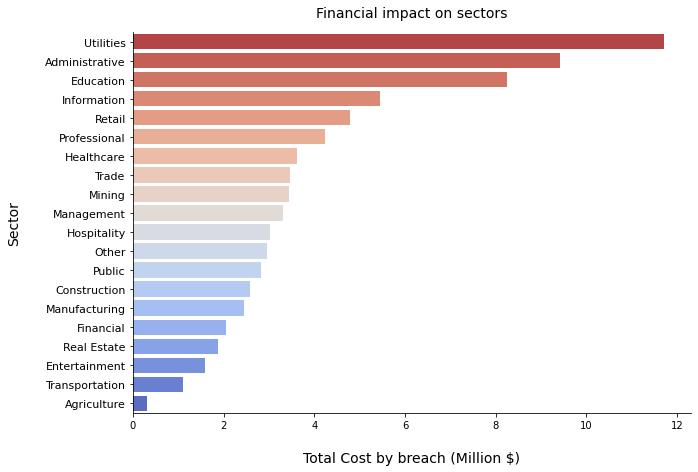

In [59]:
fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.barplot(data=dataset16,
                 x = "eff_rate",
                 y = "sector",
                 ci = None,
                 palette = "coolwarm_r",
                 order=dataset16.sort_values('eff_rate', ascending=False).sector)


ax.set_title('Financial impact on sectors',
             fontsize=14,
             pad=15.0)

plt.xlabel("Total Cost by breach (Million $)",
           fontsize=14)

plt.ylabel("Sector",
           fontsize=14)

plt.yticks(fontsize=11)

ax.xaxis.set_label_coords(0.5, -0.10)
ax.yaxis.set_label_coords(-0.2, 0.5)

sns.despine()

plt.savefig("financialimpact_by_sector.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 7* --> The sector with the highest cost by breach was the sector of Utilities. Almost 12 million dollars were lost by breach during the analyzed period. Although the sector of Utilities is neither the one with the highest number of attacks nor the one that has the highest amount of losses, its breaches cause a great loss. Following the Utilities sector are the Administrative and the Education sectors. Each breach on them causes around 9 million dollars of losses. It would be interesting to investigate how these sectors have been being attacked in the last years.    